In [ ]:
# %pip install --force-reinstall pandas numpy torch torchvision torchaudio scikit-learn tqdm scikit-learn transformers nltk matplotlib
# %pip install --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# %pip install --force-reinstall gensim

  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.22.1-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.7.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached transformers-4.54.1-py3-none-any.whl.metadata (41 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_ex

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.6.1-py3-none-any.whl.m

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.


  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.3.0.post1-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl (24.0 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached smart_open-7.3.0.post1-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl (38 kB)

  Attempting uninstall: wrapt

    Found existing installation: wrapt 1.17.2

   ---------------------------------------- 0/5 [wrapt]
   ---------------------------------------- 0/5 [wrapt]
    Uninstalling wrapt-1.17.2:
   ---------------------------------------- 0/5 [wrapt]
      Successfully uninstalled wrapt-1.17.2
   ----------

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
from torch.utils.data import DataLoader
import torch.nn.utils.rnn as rnn_utils
import matplotlib.pyplot as plt
import torch.onnx


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
diagnoses = notes = pd.read_csv('mimiciii_data/DIAGNOSES_ICD.csv.gz', compression='gzip')
admissions = notes = pd.read_csv('mimiciii_data/ADMISSIONS.csv.gz', compression='gzip')
notes = pd.read_csv('mimiciii_data/NOTEEVENTS.csv.gz', compression='gzip')
disch_notes = notes[notes['CATEGORY'] == 'Discharge summary']
disch_notes = disch_notes.sort_values(by='CHARTDATE').groupby('HADM_ID')['TEXT'].last().reset_index()

diag_codes = diagnoses.groupby('HADM_ID')['ICD9_CODE'].apply(list).reset_index()

C:\Users\arizt\AppData\Local\Temp\ipykernel_19472\1698704895.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv('mimiciii_data/NOTEEVENTS.csv.gz', compression='gzip')


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[\*\*.*?\*\*\]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

disch_notes['TEXT'] = disch_notes['TEXT'].apply(clean_text)

In [ ]:
merged = pd.merge(disch_notes, diag_codes, on='HADM_ID')
merged = merged.dropna(subset=['TEXT', 'ICD9_CODE'])
merged['ICD9_CODE'] = merged['ICD9_CODE'].apply(lambda codes: [str(code) for code in codes])

Coverage for top 1 codes: 38.02%
Coverage for top 10 codes: 76.93%
Coverage for top 100 codes: 96.02%
Coverage for top 1000 codes: 99.70%


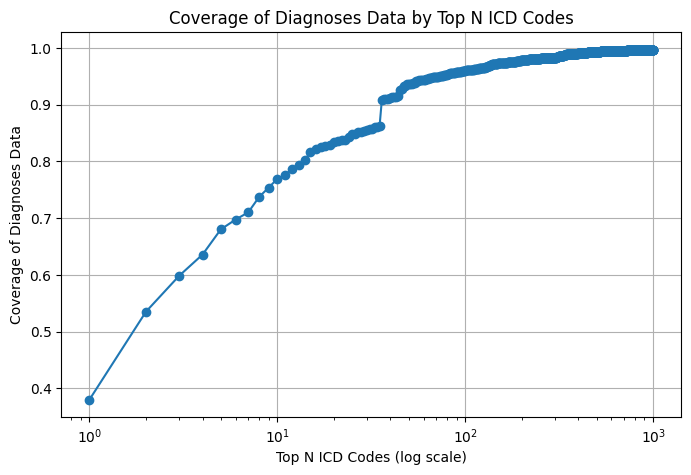

In [ ]:
def plot_top_n_coverage(df, n=1000):
    df = df.dropna(subset=['ICD9_CODE'])
    df['ICD9_CODE'] = df['ICD9_CODE'].apply(lambda codes: [str(code) for code in codes] if isinstance(codes, (list, tuple)) else [str(codes)])
    all_codes = [code for codes in df['ICD9_CODE'] for code in codes]
    code_counts = Counter(all_codes)
    coverages = []
    pows = [10**i for i in range(int(np.log10(n))+1) if 10**i <= n]
    for k in range(1, n+1):
        current_top = [code for code, _ in code_counts.most_common(k)]
        cov = df['ICD9_CODE'].apply(lambda codes: any(code in current_top for code in codes)).mean()
        coverages.append(cov)
        if (k in pows):
            print(f'Coverage for top {k} codes: {cov*100:.2f}%')
    plt.figure(figsize=(8,5))
    plt.plot(range(1, n+1), coverages, marker='o')
    plt.xscale('log')
    plt.xlabel('Top N ICD Codes (log scale)')
    plt.ylabel('Coverage of Diagnoses Data')
    plt.title('Coverage of Diagnoses Data by Top N ICD Codes')
    plt.grid(True, which='major', axis='both')
    plt.show()

plot_top_n_coverage(merged)

In [ ]:
all_codes = [code for codes in merged['ICD9_CODE'] for code in codes]
top100 = set([code for code, _ in Counter(all_codes).most_common(100)])

def filter_top100(row):
    filtered = [code for code in row if code in top100]
    return filtered if filtered else None

merged['ICD9_CODE'] = merged['ICD9_CODE'].apply(filter_top100)
merged = merged.dropna(subset=['ICD9_CODE'])

In [ ]:
train, temp = train_test_split(merged, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=7)
print(f"Train shape: {train.shape}, Validation shape: {val.shape}, Test shape: {test.shape}")

Train shape: (40500, 3), Validation shape: (5062, 3), Test shape: (5063, 3)


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

train_sentences = train['TEXT'].apply(word_tokenize).tolist()
cbow_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=5, workers=16, sg=0)  # sg=0 for CBOW

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arizt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arizt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
word2idx = {word: i for i, word in enumerate(cbow_model.wv.index_to_key)}
UNK_IDX = len(word2idx)
word2idx['<UNK>'] = UNK_IDX

mlb = MultiLabelBinarizer()
mlb.fit(train['ICD9_CODE'])
num_classes = len(mlb.classes_)
max_len = 250
embed_dim = cbow_model.vector_size
vocab_size = len(word2idx)
embeddings = np.vstack([cbow_model.wv.vectors, np.zeros((1, embed_dim))])

In [ ]:
def train_model(model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.BCELoss()
    name = type(model).__name__

    for epoch in range(10):
        model.train()
        total_loss = 0
        train_iter = tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]", leave=False)
        for x, y in train_iter:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
            train_iter.set_postfix(loss=loss.item())
        avg_loss = total_loss / len(train_loader.dataset)
        print(f"[{name}] Epoch {epoch+1}, Train Loss: {avg_loss:.4f}")
        model.eval()
        val_loss = 0
        val_iter = tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]", leave=False)
        with torch.no_grad():
            for x, y in val_iter:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item() * x.size(0)
                val_iter.set_postfix(loss=loss.item())
        avg_val_loss = val_loss / len(val_loader.dataset)
        print(f"[{name}] Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")

In [ ]:
def get_preds_and_labels(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            out = model(x).cpu().numpy()
            all_preds.append(out)
            all_labels.append(y.numpy())
    return np.vstack(all_preds), np.vstack(all_labels)

def optimize_threshold(y_true, y_pred):
    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.1, 0.91, 0.01):
        y_bin = (y_pred >= thresh).astype(int)
        f1 = f1_score(y_true, y_bin, average='micro')
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, best_f1

def evaluate(model, val_loader, test_loader):
    val_preds, val_labels = get_preds_and_labels(model, val_loader)
    best_thresh, best_val_f1 = optimize_threshold(val_labels, val_preds)
    print(f'Best threshold: {best_thresh:.2f}, Best val F1: {best_val_f1:.4f}')

    test_preds, test_labels = get_preds_and_labels(model, test_loader)
    test_bin = (test_preds >= best_thresh).astype(int)

    precision = precision_score(test_labels, test_bin, average='micro', zero_division=0)
    recall = recall_score(test_labels, test_bin, average='micro', zero_division=0)
    f1 = f1_score(test_labels, test_bin, average='micro', zero_division=0)

    print(f'Test Precision: {precision:.4f}')
    print(f'Test Recall: {recall:.4f}')
    print(f'Test F1: {f1:.4f}')

In [ ]:
class FeedforwardBaseline(nn.Module):
    def __init__(self, embed_dim, num_classes, hidden_dim=128):
        super(FeedforwardBaseline, self).__init__()
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
def get_mean_embedding(sentence, word2idx, embeddings):
    tokens = word_tokenize(sentence)
    idxs = [word2idx.get(word, UNK_IDX) for word in tokens]
    vecs = embeddings[idxs]
    return np.mean(vecs, axis=0)

class NotesBaselineDataset(Dataset):
    def __init__(self, df):
        self.texts = df['TEXT'].tolist()
        self.labels = mlb.transform(df['ICD9_CODE'])
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        x = get_mean_embedding(self.texts[idx], word2idx, embeddings)
        y = self.labels[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
train_ds_base = NotesBaselineDataset(train)
val_ds_base = NotesBaselineDataset(val)
test_ds_base = NotesBaselineDataset(test)
train_loader_base = DataLoader(train_ds_base, batch_size=32, shuffle=True)
val_loader_base = DataLoader(val_ds_base, batch_size=32)
test_loader_base = DataLoader(test_ds_base, batch_size=32)

baseline_model = FeedforwardBaseline(embed_dim, num_classes)
baseline_model = baseline_model.to(device)
train_model(baseline_model, train_loader_base, val_loader_base)
evaluate(baseline_model, val_loader_base, test_loader_base)

[FeedforwardBaseline] Epoch 1, Train Loss: 0.1884


[FeedforwardBaseline] Epoch 1, Val Loss: 0.1704


[FeedforwardBaseline] Epoch 2, Train Loss: 0.1711


[FeedforwardBaseline] Epoch 2, Val Loss: 0.1654


[FeedforwardBaseline] Epoch 3, Train Loss: 0.1672


[FeedforwardBaseline] Epoch 3, Val Loss: 0.1624


[FeedforwardBaseline] Epoch 4, Train Loss: 0.1646


[FeedforwardBaseline] Epoch 4, Val Loss: 0.1610


[FeedforwardBaseline] Epoch 5, Train Loss: 0.1630


[FeedforwardBaseline] Epoch 5, Val Loss: 0.1594


[FeedforwardBaseline] Epoch 6, Train Loss: 0.1617


[FeedforwardBaseline] Epoch 6, Val Loss: 0.1586


[FeedforwardBaseline] Epoch 7, Train Loss: 0.1607


[FeedforwardBaseline] Epoch 7, Val Loss: 0.1580


[FeedforwardBaseline] Epoch 8, Train Loss: 0.1599


[FeedforwardBaseline] Epoch 8, Val Loss: 0.1575


[FeedforwardBaseline] Epoch 9, Train Loss: 0.1593


[FeedforwardBaseline] Epoch 9, Val Loss: 0.1572


[FeedforwardBaseline] Epoch 10, Train Loss: 0.1588


[FeedforwardBaseline] Epoch 10, Val Loss: 0.1565
Best threshold: 0.21, Best val F1: 0.4250
Test Precision: 0.4019
Test Recall: 0.4462
Test F1: 0.4229


In [ ]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, embeddings, num_classes, dropout_rate=0.2):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings))
        self.embedding.weight.requires_grad = False

        self.conv1 = nn.Conv2d(1, 128, (5, embed_dim))
        self.pool1 = nn.MaxPool2d((5, 1))
        self.conv2 = nn.Conv2d(128, 128, (5, 1))
        self.pool2 = nn.MaxPool2d((5, 1))
        self.conv3 = nn.Conv2d(128, 128, (5, 1))
        self.pool3 = nn.AdaptiveMaxPool2d((1, 1))

        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
def encode_sentence(sentence, word2idx, max_len):
    idxs = [word2idx.get(word, UNK_IDX) for word in word_tokenize(sentence)]
    if len(idxs) < max_len:
        idxs += [0] * (max_len - len(idxs))
    else:
        idxs = idxs[:max_len]
    return idxs

class NotesDataset(Dataset):
    def __init__(self, df):
        self.texts = df['TEXT'].tolist()
        self.labels = mlb.transform(df['ICD9_CODE'])
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        x = encode_sentence(self.texts[idx], word2idx, max_len)
        y = self.labels[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.float32)

In [ ]:
train_ds = NotesDataset(train)
val_ds = NotesDataset(val)
test_ds = NotesDataset(test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

model = TextCNN(vocab_size, embed_dim, embeddings, num_classes)
model = model.to(device)
train_model(model, train_loader, val_loader)
evaluate(model, val_loader, test_loader)

[TextCNN] Epoch 1, Train Loss: 0.1924


[TextCNN] Epoch 1, Val Loss: 0.1724


[TextCNN] Epoch 2, Train Loss: 0.1753


[TextCNN] Epoch 2, Val Loss: 0.1672


[TextCNN] Epoch 3, Train Loss: 0.1710


[TextCNN] Epoch 3, Val Loss: 0.1642


[TextCNN] Epoch 4, Train Loss: 0.1685


[TextCNN] Epoch 4, Val Loss: 0.1651


[TextCNN] Epoch 5, Train Loss: 0.1665


[TextCNN] Epoch 5, Val Loss: 0.1631


[TextCNN] Epoch 6, Train Loss: 0.1650


[TextCNN] Epoch 6, Val Loss: 0.1628


[TextCNN] Epoch 7, Train Loss: 0.1633


[TextCNN] Epoch 7, Val Loss: 0.1628


[TextCNN] Epoch 8, Train Loss: 0.1619


[TextCNN] Epoch 8, Val Loss: 0.1628


[TextCNN] Epoch 9, Train Loss: 0.1605


[TextCNN] Epoch 9, Val Loss: 0.1628


[TextCNN] Epoch 10, Train Loss: 0.1593


[TextCNN] Epoch 10, Val Loss: 0.1637
Best threshold: 0.21, Best val F1: 0.4015
Test Precision: 0.4033
Test Recall: 0.4134
Test F1: 0.4083


In [ ]:
class MultiScaleTextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, embeddings, num_classes, dropout_rate=0.5):
        super(MultiScaleTextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings))
        self.embedding.weight.requires_grad = False
        self.conv2 = nn.Conv2d(1, 64, (2, embed_dim))
        self.conv3 = nn.Conv2d(1, 64, (3, embed_dim))
        self.conv4 = nn.Conv2d(1, 64, (4, embed_dim))
        self.dropout = nn.Dropout(dropout_rate)
        self.batchnorm = nn.BatchNorm1d(700)
        self.fc = nn.Linear(700, num_classes)
    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x2 = F.relu(self.conv2(x)).squeeze(3)
        x3 = F.relu(self.conv3(x)).squeeze(3)
        x4 = F.relu(self.conv4(x)).squeeze(3)
        x2 = F.max_pool1d(x2, x2.size(2)).squeeze(2)
        x3 = F.max_pool1d(x3, x3.size(2)).squeeze(2)
        x4 = F.max_pool1d(x4, x4.size(2)).squeeze(2)
        x_cat = torch.cat((x2, x3, x4), 1)
        # Pad to 700 units if needed
        if x_cat.size(1) < 700:
            pad = torch.zeros(x_cat.size(0), 700 - x_cat.size(1), device=x_cat.device)
            x_cat = torch.cat([x_cat, pad], dim=1)
        elif x_cat.size(1) > 700:
            x_cat = x_cat[:, :700]
        x_cat = self.dropout(x_cat)
        x_cat = self.batchnorm(x_cat)
        out = self.fc(x_cat)
        out = torch.sigmoid(out)
        return out

In [ ]:
cnn_model2 = MultiScaleTextCNN(vocab_size, embed_dim, embeddings, num_classes)
cnn_model2 = cnn_model2.to(device)
train_model(cnn_model2, train_loader, val_loader)
evaluate(cnn_model2, val_loader, test_loader)

[MultiScaleTextCNN] Epoch 1, Train Loss: 0.1999


[MultiScaleTextCNN] Epoch 1, Val Loss: 0.1693


[MultiScaleTextCNN] Epoch 2, Train Loss: 0.1779


[MultiScaleTextCNN] Epoch 2, Val Loss: 0.1654


[MultiScaleTextCNN] Epoch 3, Train Loss: 0.1751


[MultiScaleTextCNN] Epoch 3, Val Loss: 0.1625


[MultiScaleTextCNN] Epoch 4, Train Loss: 0.1733


[MultiScaleTextCNN] Epoch 4, Val Loss: 0.1612


[MultiScaleTextCNN] Epoch 5, Train Loss: 0.1721


[MultiScaleTextCNN] Epoch 5, Val Loss: 0.1595


[MultiScaleTextCNN] Epoch 6, Train Loss: 0.1712


[MultiScaleTextCNN] Epoch 6, Val Loss: 0.1593


[MultiScaleTextCNN] Epoch 7, Train Loss: 0.1704


[MultiScaleTextCNN] Epoch 7, Val Loss: 0.1581


[MultiScaleTextCNN] Epoch 8, Train Loss: 0.1698


[MultiScaleTextCNN] Epoch 8, Val Loss: 0.1577


[MultiScaleTextCNN] Epoch 9, Train Loss: 0.1693


[MultiScaleTextCNN] Epoch 9, Val Loss: 0.1576


[MultiScaleTextCNN] Epoch 10, Train Loss: 0.1692


[MultiScaleTextCNN] Epoch 10, Val Loss: 0.1573
Best threshold: 0.19, Best val F1: 0.4307
Test Precision: 0.4382
Test Recall: 0.4329
Test F1: 0.4356


In [ ]:
class TextGRU(nn.Module):
    def __init__(self, vocab_size, embed_dim, embeddings, num_classes, hidden_dim=128, num_layers=1):
        super(TextGRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings))
        self.embedding.weight.requires_grad = False
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
    def forward(self, x, lengths):
        x = self.embedding(x)
        packed = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        out_packed, _ = self.gru(packed)
        out, _ = rnn_utils.pad_packed_sequence(out_packed, batch_first=True)
        out_forward = out[range(len(out)), lengths-1, :self.gru.hidden_size]
        out_backward = out[:, 0, self.gru.hidden_size:]
        out_cat = torch.cat([out_forward, out_backward], dim=1)
        out = self.fc(out_cat)
        out = torch.sigmoid(out)
        return out

In [ ]:
def encode_sentence_with_length(sentence, word2idx, max_len):
    idxs = [word2idx.get(word, UNK_IDX) for word in word_tokenize(sentence)]
    length = min(len(idxs), max_len)
    if len(idxs) < max_len:
        idxs += [0] * (max_len - len(idxs))
    else:
        idxs = idxs[:max_len]
    return idxs, length

def collate_fn_gru(batch):
    xs, ys, lengths = zip(*batch)
    xs = torch.stack(xs)
    ys = torch.stack(ys)
    lengths = torch.tensor(lengths, dtype=torch.long)
    return xs, ys, lengths

class NotesDatasetRNN(Dataset):
    def __init__(self, df):
        self.texts = df['TEXT'].tolist()
        self.labels = mlb.transform(df['ICD9_CODE'])
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        x, length = encode_sentence_with_length(self.texts[idx], word2idx, max_len)
        y = self.labels[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.float32), length

In [ ]:
def rnn_train(model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.BCELoss()
    name = type(model).__name__

    for epoch in range(10):
        model.train()
        total_loss = 0
        train_iter = tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]", leave=False)
        for x, y, lengths in train_iter:
            x, y, lengths = x.to(device), y.to(device), lengths.to(device)
            optimizer.zero_grad()
            out = model(x, lengths.cpu())
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
            train_iter.set_postfix(loss=loss.item())
        avg_loss = total_loss / len(train_loader.dataset)
        print(f"[{name}] Epoch {epoch+1}, Train Loss: {avg_loss:.4f}")
        model.eval()
        val_loss = 0
        val_iter = tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]", leave=False)
        with torch.no_grad():
            for x, y, lengths in val_iter:
                x, y, lengths = x.to(device), y.to(device), lengths.to(device)
                out = model(x, lengths.cpu())
                loss = criterion(out, y)
                val_loss += loss.item() * x.size(0)
                val_iter.set_postfix(loss=loss.item())
        avg_val_loss = val_loss / len(val_loader.dataset)
        print(f"[{name}] Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")

In [ ]:
def rnn_get_preds_and_labels(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x, y, lengths in loader:
            x, lengths = x.to(device), lengths.to(device)
            out = model(x, lengths.cpu()).cpu().numpy()
            all_preds.append(out)
            all_labels.append(y.numpy())
    return np.vstack(all_preds), np.vstack(all_labels)

def rnn_evaluate(model, val_loader, test_loader):
    val_preds_gru, val_labels_gru = rnn_get_preds_and_labels(model, val_loader)
    best_thresh_gru, best_val_f1_gru = optimize_threshold(val_labels_gru, val_preds_gru)
    print(f'GRU Best threshold: {best_thresh_gru:.2f}, Best val F1: {best_val_f1_gru:.4f}')

    test_preds_gru, test_labels_gru = rnn_get_preds_and_labels(model, test_loader)
    test_bin_gru = (test_preds_gru >= best_thresh_gru).astype(int)

    precision_gru = precision_score(test_labels_gru, test_bin_gru, average='micro', zero_division=0)
    recall_gru = recall_score(test_labels_gru, test_bin_gru, average='micro', zero_division=0)
    f1_gru = f1_score(test_labels_gru, test_bin_gru, average='micro', zero_division=0)

    print(f'Test Precision: {precision_gru:.4f}')
    print(f'Test Recall: {recall_gru:.4f}')
    print(f'Test F1: {f1_gru:.4f}')

In [ ]:
train_ds = NotesDatasetRNN(train)
val_ds = NotesDatasetRNN(val)
test_ds = NotesDatasetRNN(test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn_gru)
val_loader = DataLoader(val_ds, batch_size=32, collate_fn=collate_fn_gru)
test_loader = DataLoader(test_ds, batch_size=32, collate_fn=collate_fn_gru)

gru_model = TextGRU(vocab_size, embed_dim, embeddings, num_classes)
gru_model = gru_model.to(device)
rnn_train(gru_model, train_loader, val_loader)
rnn_evaluate(gru_model, val_loader, test_loader)

[TextGRU] Epoch 1, Train Loss: 0.1843


[TextGRU] Epoch 1, Val Loss: 0.1639


[TextGRU] Epoch 2, Train Loss: 0.1614


[TextGRU] Epoch 2, Val Loss: 0.1561


[TextGRU] Epoch 3, Train Loss: 0.1553


[TextGRU] Epoch 3, Val Loss: 0.1522


[TextGRU] Epoch 4, Train Loss: 0.1517


[TextGRU] Epoch 4, Val Loss: 0.1506


[TextGRU] Epoch 5, Train Loss: 0.1491


[TextGRU] Epoch 5, Val Loss: 0.1496


[TextGRU] Epoch 6, Train Loss: 0.1470


[TextGRU] Epoch 6, Val Loss: 0.1491


[TextGRU] Epoch 7, Train Loss: 0.1454


[TextGRU] Epoch 7, Val Loss: 0.1489


[TextGRU] Epoch 8, Train Loss: 0.1439


[TextGRU] Epoch 8, Val Loss: 0.1495


[TextGRU] Epoch 9, Train Loss: 0.1426


[TextGRU] Epoch 9, Val Loss: 0.1500


[TextGRU] Epoch 10, Train Loss: 0.1414


[TextGRU] Epoch 10, Val Loss: 0.1497
GRU Best threshold: 0.28, Best val F1: 0.4656
Test Precision: 0.5019
Test Recall: 0.4472
Test F1: 0.4730


In [ ]:
class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, embeddings, num_classes, hidden_dim=128, num_layers=1):
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
    def forward(self, x, lengths):
        x = self.embedding(x)
        packed = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        out_packed, (h_n, c_n) = self.lstm(packed)
        out, _ = rnn_utils.pad_packed_sequence(out_packed, batch_first=True)
        out_forward = out[range(len(out)), lengths-1, :self.lstm.hidden_size]
        out_backward = out[:, 0, self.lstm.hidden_size:]
        out_cat = torch.cat([out_forward, out_backward], dim=1)
        out = self.fc(out_cat)
        out = torch.sigmoid(out)
        return out

In [ ]:
lstm_model = TextLSTM(vocab_size, embed_dim, embeddings, num_classes)
lstm_model = lstm_model.to(device)
rnn_train(lstm_model, train_loader, val_loader)
rnn_evaluate(lstm_model, val_loader, test_loader)

[TextLSTM] Epoch 1, Train Loss: 0.1930


[TextLSTM] Epoch 1, Val Loss: 0.1769


[TextLSTM] Epoch 2, Train Loss: 0.1749


[TextLSTM] Epoch 2, Val Loss: 0.1691


[TextLSTM] Epoch 3, Train Loss: 0.1688


[TextLSTM] Epoch 3, Val Loss: 0.1650


[TextLSTM] Epoch 4, Train Loss: 0.1649


[TextLSTM] Epoch 4, Val Loss: 0.1630


[TextLSTM] Epoch 5, Train Loss: 0.1620


[TextLSTM] Epoch 5, Val Loss: 0.1611


[TextLSTM] Epoch 6, Train Loss: 0.1594


[TextLSTM] Epoch 6, Val Loss: 0.1597


[TextLSTM] Epoch 7, Train Loss: 0.1573


[TextLSTM] Epoch 7, Val Loss: 0.1597


[TextLSTM] Epoch 8, Train Loss: 0.1553


[TextLSTM] Epoch 8, Val Loss: 0.1586


[TextLSTM] Epoch 9, Train Loss: 0.1538


[TextLSTM] Epoch 9, Val Loss: 0.1587


[TextLSTM] Epoch 10, Train Loss: 0.1523


[TextLSTM] Epoch 10, Val Loss: 0.1583
GRU Best threshold: 0.23, Best val F1: 0.4219
Test Precision: 0.4294
Test Recall: 0.4171
Test F1: 0.4232


In [ ]:
torch.save(baseline_model.state_dict(), 'FeedforwardBaseline.pt')
torch.save(model.state_dict(), 'TextCNN.pt')
torch.save(cnn_model2.state_dict(), 'MultiScaleTextCNN.pt')
torch.save(gru_model.state_dict(), 'TextGRU.pt')
torch.save(lstm_model.state_dict(), 'TextLSTM.pt')